# NAME-MOHD FAUZAN

# Data Science and Business Analytics intern at The Spark Foundation

# Task1: Prediction using Supervised Machine Learning

# #Aim- Predict the percentage of  student based on number of study hours

# Link of dataset: http://bit.ly/w-data

# Now importing all necessary libraries to perform the task

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Loading the student_data from dataset link

In [3]:
student_data=pd.read_csv("http://bit.ly/w-data")
student_data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Cheking the information of student_data 

In [5]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
student_data.shape

(25, 2)

In [8]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Now plotting the the scatterplot of student_data

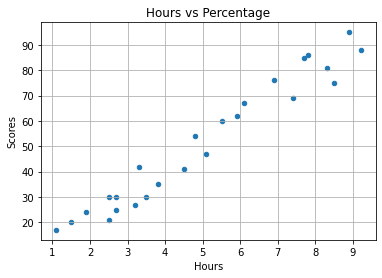

In [9]:
student_data.plot.scatter(x='Hours', y='Scores')  
plt.title('Hours vs Percentage')
plt.grid()
plt.show()

# Import seaborn as sns

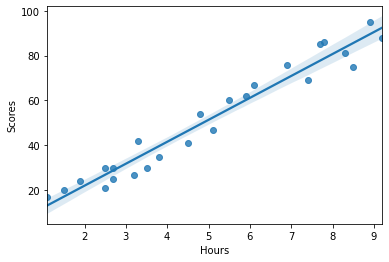

In [10]:
import seaborn as sns
sns.regplot(x=student_data['Hours'],y=student_data['Scores']);

# Plotting the Boxplot of student_data

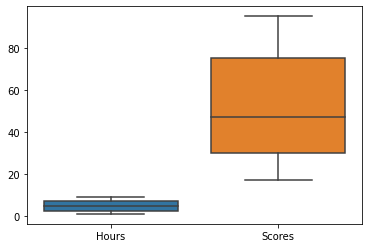

In [11]:
sns.boxplot(data=student_data[["Hours","Scores"]]);

### There is positive relationship between Hours and Scores by looking plot

# Prepare the student_data

In [12]:
x=student_data.iloc[:, :-1].values
y=student_data.iloc[:,1].values

In [13]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Now split the student_data for Training and Test set

In [16]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.25, random_state=0) 

### we alloted 25% of student_data for testing and 75% of student_data for training


# Now Train the Algorithm


## Simple Linear Regression

### We will predict the percentage of marks of that a student is expected to score based on number of hours they studied

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Complete the Training.")

Complete the Training.


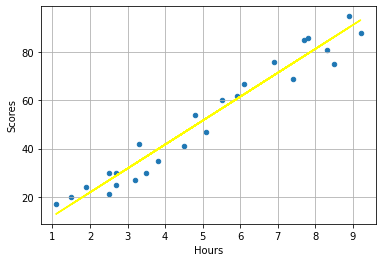

In [18]:
line = regressor.coef_*x+regressor.intercept_
student_data.plot.scatter(x="Hours", y="Scores")
plt.plot(x, line,color='yellow');
plt.grid()
plt.show()

#### After plotting the regression line, we can see there is clear indication of postive linear relation between Hours and Scores

In [20]:
y_pred = regressor.predict(x_test) 
print(y_pred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


## Comparing the actual value vs predicted value

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


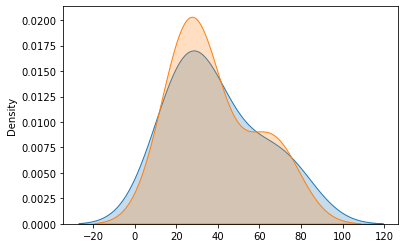

In [22]:
sns.kdeplot(y_pred,label="Predicted",shade=True);
sns.kdeplot(data=y_test,label="Actual",shade=True);

# Now we are aimed to predict the score if a student studies for 9.25 hrs/day

In [24]:
my_hours=np.array([[9.25]])
my_pred=regressor.predict(my_hours)
print("Number of Hours = {}".format(my_hours[0][0]))
print("Predicted Score = {}".format(my_pred[0]))

Number of Hours = 9.25
Predicted Score = 93.89272889341655


# Evalute the Model 

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502486
